## **LAB WORK 2**

### *Step 1 - Import Library*

Importing the necessary libraries, including NumPy, Matplotlib, and Pandas

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### *Step 2 - Load Data*

Reads the dataset using pd.read_csv and selects the feature (independent variable X) and target (dependent variable y).

In [2]:
# Import dataset
dataset = pd.read_csv('../data/Posisi_gaji.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values # Convert to just one column

### *Step 3 - Preprocessing --> Feature Scaling*

Use StandardScaler to scale feature X and target y. This is necessary because SVM is very sensitive to data scale

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### *Step 4 - Fit SVR Model*

Create an SVR model with an RBF (Radial Basis Function) kernel and train it with scaled data.

In [4]:
# Fitting SVR to dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\faral\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### *Step 5 - Visualize*

Perform visualization using graphs to visualize the prediction results of the SVR model. This includes plotting the original data (red dots) and the predicted yield curve (blue lines) for varying position levels.

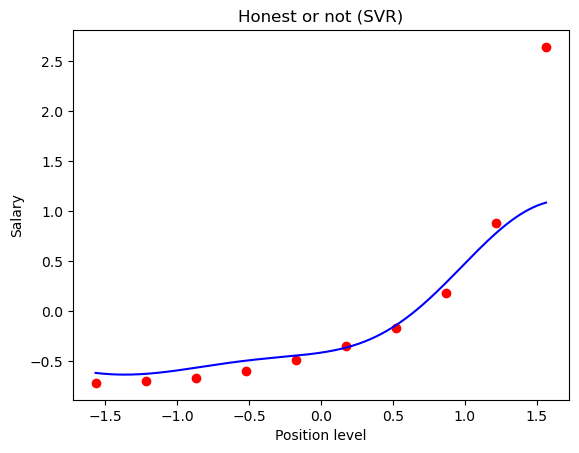

In [5]:
# Visualization of SVR results (high resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Honest or not (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### *Step 6 - Make a Prediction*

1. Create a 2D array containing the level of positions to be predicted. In this example, the position level is 6.5.
2. Scaling the prediction feature using sc_X.transform.
3. Make predictions using the trained SVR model.
4. Return the prediction results to the original scale using sc_y.inverse_transform.

In [7]:
# Prediksi hasil
# Buat array 2D yang berisi tingkat posisi yang akan diprediksi
tingkat_posisi_prediksi = np.array([[6.5]])
# Penskalaan fitur untuk data yang akan diprediksi
tingkat_posisi_prediksi = sc_X.transform(tingkat_posisi_prediksi)
# Melakukan prediksi menggunakan model SVR
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
# Kembalikan hasil prediksi ke skala aslinya
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

### *Step 7 - Print Result*

Displays salary prediction results for position level 6.5 in the code

In [8]:
# Show result
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### *Step 9 - Model Evaluation*

Conduct model evaluation including MAE, MSE and R-squared

In [9]:
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y
y_pred = regressor.predict(X)

# Calculates MAE
mae = mean_absolute_error(y_actual, y_pred)

# Calculates MSE
mse = mean_squared_error(y_actual, y_pred)

# Calculates RMSE
rmse = np.sqrt(mse)

# Calculates R-squared
r2 = r2_score(y_actual, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 0.22299274095734414
MSE: 0.24839989293792014
RMSE: 0.4983973243687411
R-squared: 0.7516001070620798
